# Titanic EDA
[승선한 사람들의 생존 여부 예측](https://kaggle-kr.tistory.com/17?category=868316)

__✅ `distplot`이 `seaborn`에서 버전 업데이트로 인해 제외되는 듯하다. `displot` 또는 `histplot`으로 변경해서 사용하라고 경고 메시지가 뜸__

#### __[진행 순서]__

1. 데이터셋 확인
2. EDA(탐색적 데이터 분석)
3. feature engineering
4. sklearn을 사용해 model 생성
5. 모델 학습 및 예측
6. 모델 평가

In [283]:
# 사용할 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

Text(0.5, 1.0, 'asdadas')

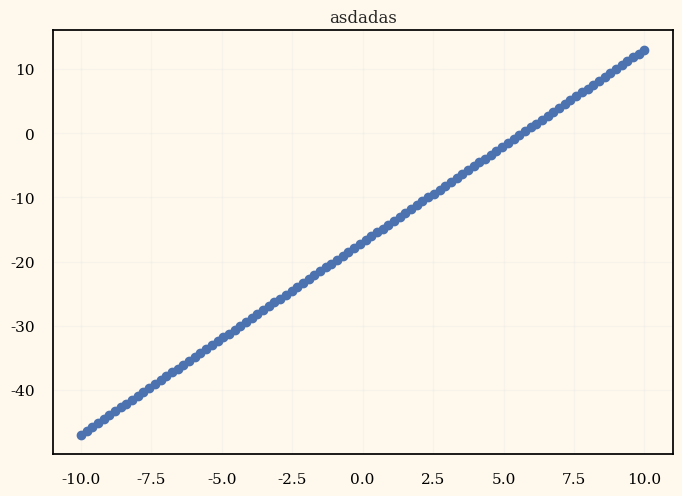

In [284]:
# 시각화 템플릿 설정

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

X = np.linspace(-10, 10, 100)
y = X*3+np.random.randn() * 10
plt.scatter(X, y)
plt.title('asdadas')

## 1. Dataset 확인

In [285]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ⭐ feature 정보

<table>
  <tr>
    <th style="background-color: darkblue">변수 (feature, variable)</th>
    <th style="background-color: darkblue">정의</th>
    <th style="background-color: darkblue">설명</th>
    <th style="background-color: darkblue">타입</th>
  </tr>
  <tr>
    <td>survived</td>
    <td>생존 여부</td>
    <td>target label로, 1 또는 0으로 표현됨</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>티켓의 클래스</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>sex</td>
    <td>성별</td>
    <td>male 또는 female로 구분되며 binary</td>
    <td>string</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>나이</td>
    <td>continuous</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>sibSp</td>
    <td>함께 탑승한 형제와 배우자의 수</td>
    <td>quantitative</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>parch</td>
    <td>함께 탑승한 부모, 아이의 수</td>
    <td>quantitative</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>ticket</td>
    <td>티켓 번호</td>
    <td>alphabat + integer</td>
    <td>string</td>
  </tr>
  <tr>
    <td>fare</td>
    <td>탑승료</td>
    <td>continuous (부동 소수점)</td>
    <td>float</td>
  </tr>
  <tr>
    <td>cabin</td>
    <td>객실 번호</td>
    <td>alphabat + integer</td>
    <td>string</td>
  </tr>
  <tr>
    <td>embarked</td>
    <td>탑승 항구</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    <td>string</td>
  </tr>
</table>


In [286]:
# 기술통계값 확인
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [287]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- count 값을 확인했을 때, null data가 존재하는 열(feature)이 있는 것 같다. 
- 그래프로 시각화해서 살펴보자.

### 1.1 Null data 

__`column: {:>10}`__
- 열(column) 이름 col의 값을 10 문자 폭(width)의 필드에 넣겠다는 것을 의미
- 열 이름이 10문자보다 짧다면, 그 필드 내에서 우측 정렬

__`Percent of NaN value: {:.2f}%`__
- 해당 열(column)의 누락된(NaN) 값의 백분율
- `:.2f` 소수점 이하 두 자리까지 표시


In [288]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [289]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train set의 `Age`(19.87%), `Cabin`(77.10%), `Embarked`(0.22%)에서 Null data가 존재하는 것을 확인
- Test set의 `Age`(20.57%), `Cabin`(78.23%), `Fare`(0.24%)에서 Null data가 존재하는 것을 확인

<AxesSubplot:>

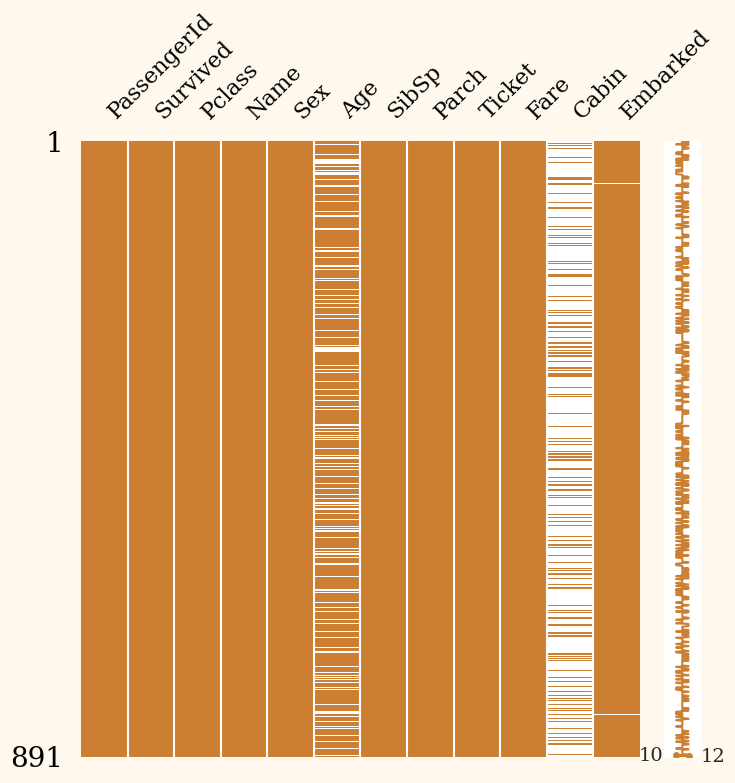

In [290]:
# msno 라이브러리를 사용해 결측값 간단히 확인

import missingno as msno
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

Text(0.5, 1.0, 'Test Data Missing Values')

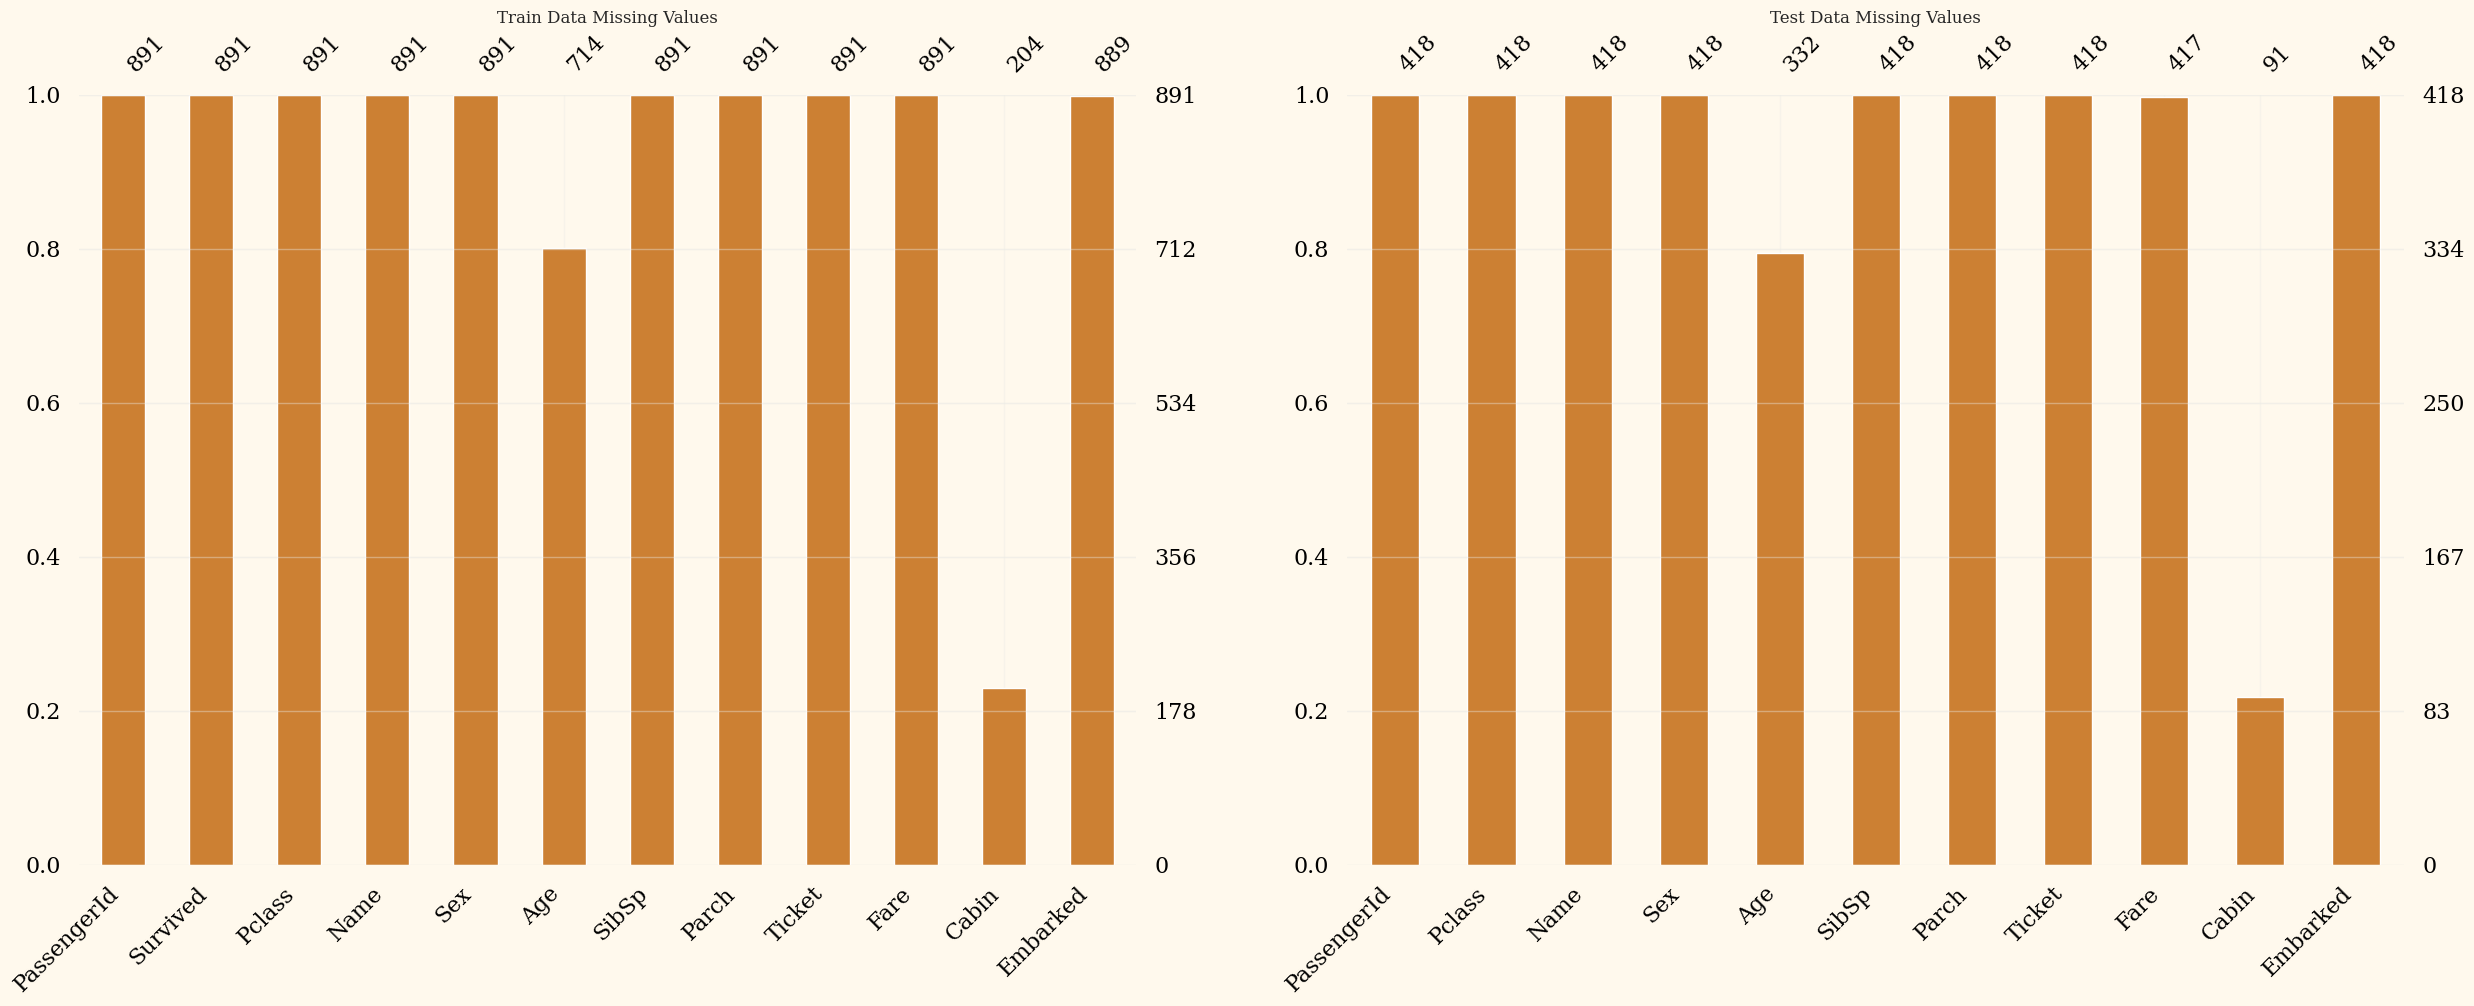

In [291]:
# subplot을 활용해 train과 test의 결측값 같이 보기

fig, axes = plt.subplots(1, 2, figsize = (30, 10))

msno.bar(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = axes[0])
axes[0].set_title('Train Data Missing Values')

msno.bar(df = df_test.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = axes[1])
axes[1].set_title('Test Data Missing Values')

### 1.2 Target label 확인

- target이 되는 label은 `생존 여부(survived)` ➡️ __binary classification__
- 1과 0이 어떤 distribution을 가지고 있는지에 따라 모델의 평가 방법이 달라질 수 있음


- `explode=[0, 0.1]`: 두 번째 조각(1인 'Survived')을 나머지 파이와 0.1의 거리로 분리
- `autopct='%1.1f%%'`: 백분율 값을 소수점 한 자리까지 표시하고 '%' 기호 붙임

Text(0.5, 1.0, 'Count plot - Survived')

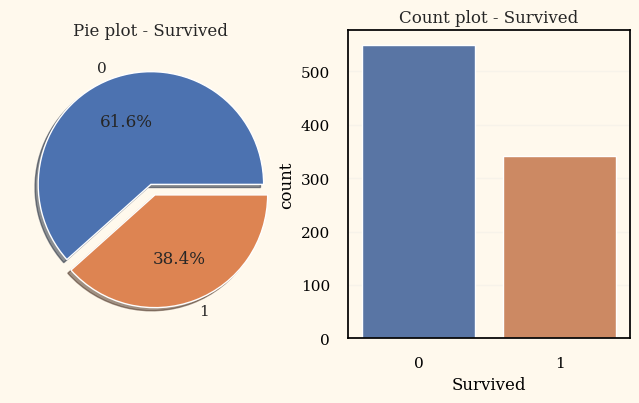

In [292]:
f, ax = plt.subplots(1, 2, figsize = (8, 4))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(data = df_train, x = 'Survived', ax = ax[1])
ax[1].set_title('Count plot - Survived')

- 살아남은 사람은 38.4%로 생존자가 적다..
- 그래도 target label 분포가 균일한 편


## 2. Exploratory data analysis

### 2.1 Pclass - 티켓 등급
- ordinal, 서수형 데이터
- 카테고리이면서 순서가 있는 데이터 타입

In [293]:
# Pclass별 count
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [294]:
# 생존한 사람 총합
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [295]:
# crosstab 활용해 한눈에 보기
pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [296]:
# margins = True로 총 count 출력
# gradient로 색상 입히기
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'Greys')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- Pclass 1 생존율 = 136 / (80 + 136) 

<Figure size 300x400 with 0 Axes>

c:\Users\cyh51\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cyh51\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cyh51\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cyh51\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


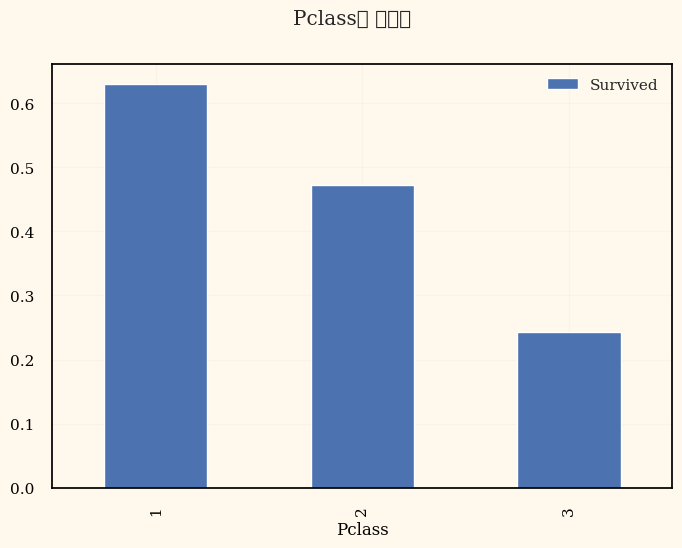

In [297]:
# Pclass별 생존율
plt.figure(figsize = (3, 4))

df_train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
plt.suptitle('Pclass별 생존율');

- Pclass가 높을 수록(1) 생존율이 높은 것을 확인할 수 있음

Text(0.5, 1.0, 'Pclass: Survived vs Dead')

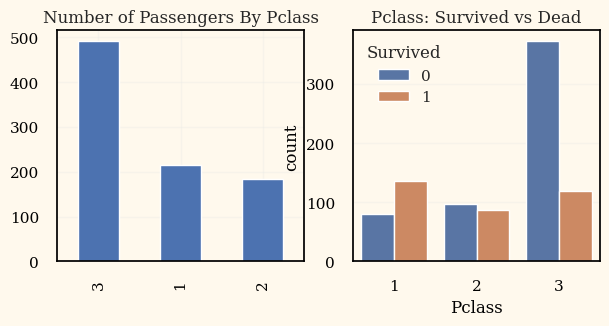

In [298]:
# seaborn countplot으로 시각화
f, ax = plt.subplots(1, 2, figsize = (7, 3))

df_train['Pclass'].value_counts().plot.bar(ax = ax[0])
sns.countplot(data = df_train, x = 'Pclass', hue = 'Survived', ax = ax[1])

ax[0].set_title('Number of Passengers By Pclass')
ax[1].set_title('Pclass: Survived vs Dead')

### 2.2 성별

Text(0.5, 1.0, 'Sex: Survived vs Dead')

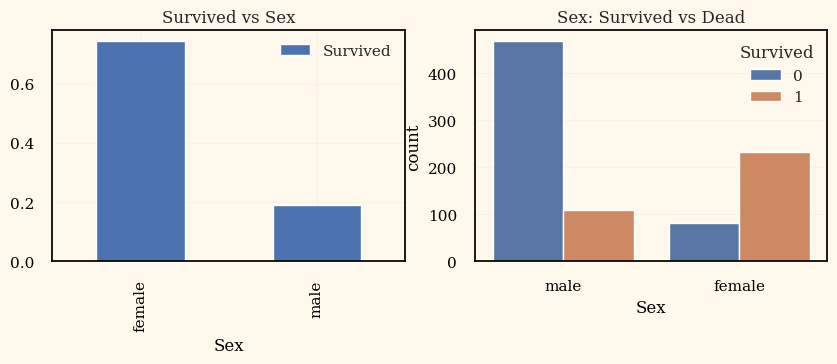

In [299]:
# 성별 생존율
f, ax = plt.subplots(1, 2, figsize = (10, 3))

df_train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax = ax[0])
sns.countplot(data = df_train, x = 'Sex', hue = 'Survived', ax = ax[1])

ax[0].set_title('Survived vs Sex')
ax[1].set_title('Sex: Survived vs Dead')

- 남자보다 여자가 생존할 확률이 높았다.

In [300]:
df_train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [301]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'Greys')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3 Sex and Pclass

In [302]:
# 사라졌나요?..
sns.factorplot('Pclass', 'Survived', hue = 'Sex')

AttributeError: module 'seaborn' has no attribute 'factorplot'

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

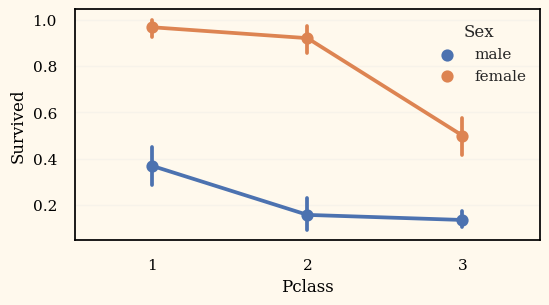

In [ ]:
# seaborn의 factorplot대신 pointplot 사용
plt.figure(figsize = (6, 3))
sns.pointplot(data = df_train, x = 'Pclass', y = 'Survived', hue = 'Sex')

### 2.4 Age

In [303]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

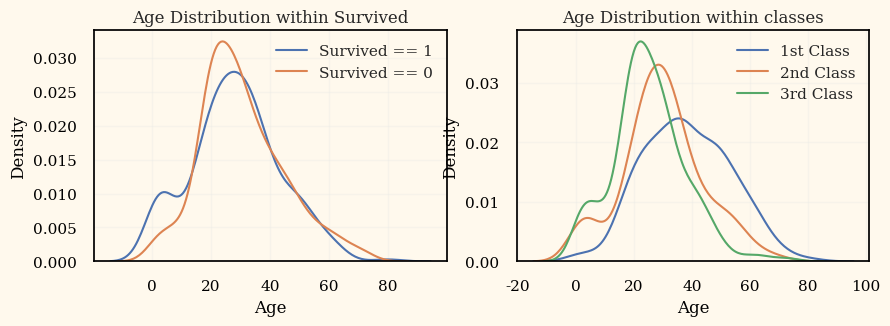

In [304]:
# 성별 생존여부와 Class 분포

fig, ax = plt.subplots(1, 2, figsize = (10, 3))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax[0])
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax[0])

ax[0].set_title('Age Distribution within Survived')
ax[0].legend(['Survived == 1', 'Survived == 0'])

sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'], ax = ax[1])
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'], ax = ax[1])
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'], ax = ax[1])

ax[1].set_title('Age Distribution within classes')
ax[1].legend(['1st Class', '2nd Class', '3rd Class'])

- Class가 높을 수록 나이 많은 사람 비중이 커짐
- 2, 3class와 생존한 사람들의 그래프 모양이 비슷함 ?

Text(0.5, 0, 'Range of Age')

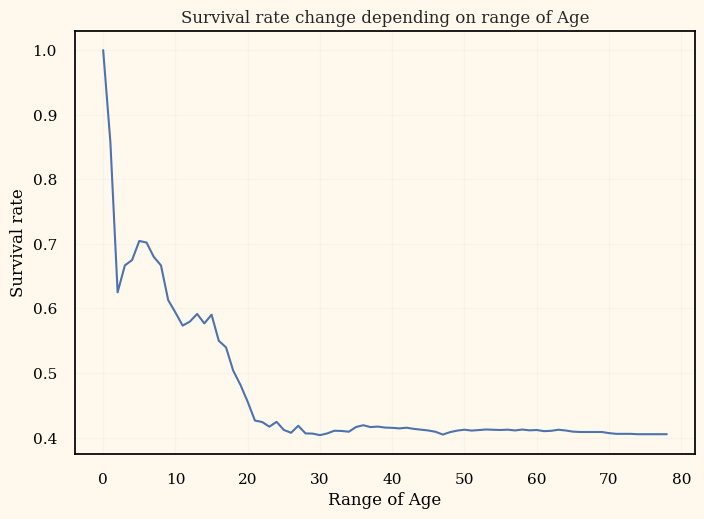

In [305]:
suv_ratio = []

for i in range(1, 80):
    suv_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.plot(suv_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age')

- 나이가 어릴 수록 생존율이 높은 것을 확실히 확인할 수 있음
- 나이가 중요한 feature로 작용할 것 같음

### 2.5 Pclass, Sex, Age

- Pclass, Sex별 생존에 따른 분포 차이 확인
- seaborn의 violinplot에서 `split = True`로 hue를 반절씩 함께 볼 수 있다.


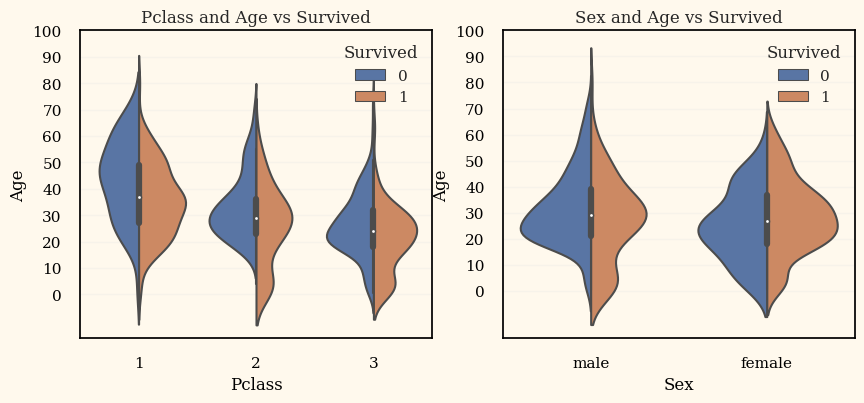

In [306]:
# seaborn의 violinplot으로 분포 확인
f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.violinplot(data = df_train, hue = 'Survived', x = 'Pclass', y = 'Age', split = True, ax = ax[0])
sns.violinplot(data = df_train, hue = 'Survived', x = 'Sex', y = 'Age', split = True, ax = ax[1])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10));


- 나이는 어릴 수록 성별은 여자가 생존을 많이 한 걸로 보인다.
- 가족 단위로 왔을 경우 자식들을 먼저 챙긴 게 아닐까???????는 추측

### 2.6 Embarked 탑승 항구

Text(0.5, 0.98, 'Survived ratio about Embark')

<Figure size 200x300 with 0 Axes>

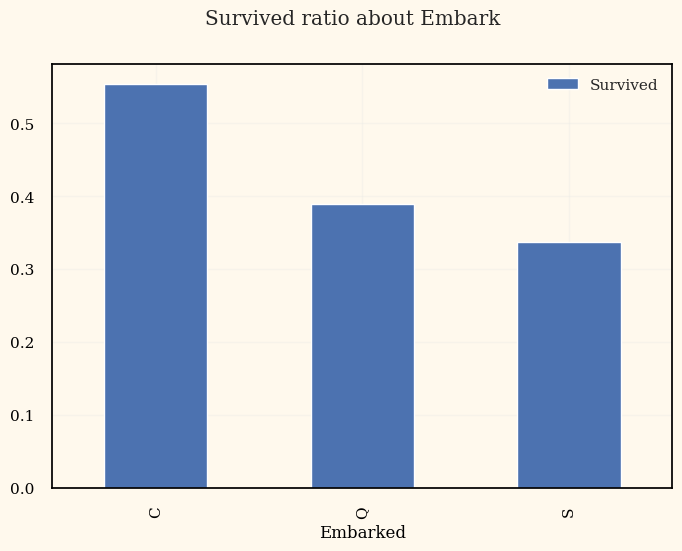

In [307]:
# 탑승항구별 생존율 확인
plt.figure(figsize = (2, 3))
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar()
plt.suptitle('Survived ratio about Embark')

- 큰 차이는 없지만 C항구에서 탄 승객들이 생존율이 가장 높았다.

Text(0, 0.5, '')

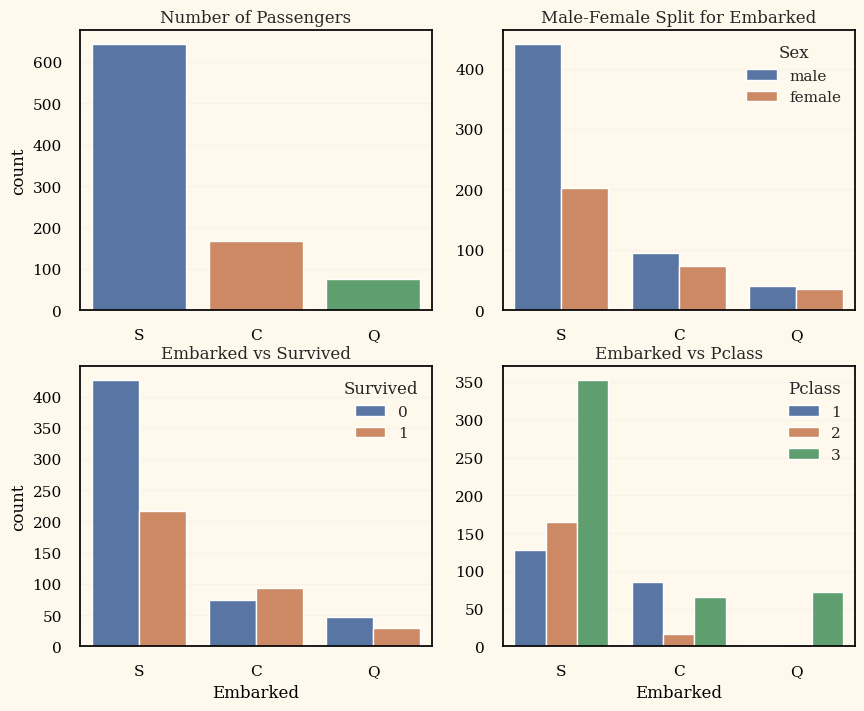

In [308]:
f, ax = plt.subplots(2, 2, figsize = (10, 8))

# 항구별 승객 수
sns.countplot(data = df_train, x = 'Embarked', ax = ax[0, 0])
ax[0, 0].set_title('Number of Passengers')
ax[0, 0].set_xlabel('')

# 항구별 성별 분포
sns.countplot(data = df_train, x = 'Embarked', hue = 'Sex', ax = ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

# 항구별 생존 여부
sns.countplot(data = df_train, x = 'Embarked', hue = 'Survived', ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

# 항구별 Pclass 분포
sns.countplot(data = df_train, x = 'Embarked', hue = 'Pclass', ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
ax[1, 1].set_ylabel('')


- 생존율이 가장 높았던 C항구에 Pclass가 높은 등급이 많이 탔음
- 생존율이 가장 낮았던 S항구에는 Pclass가 낮은 등급이 많이 탔음

### 2.7 Family = SibSp(형제 자매) + Parch(부모, 자녀) + 1(나)
- 나 + 내가 함께 탄 형제 자매와 + 부모, 자녀의 수를 합하면 = 같이 탄 가족 수가 됨

In [309]:
# test 데이터에도 똑같이 적용

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [310]:
df_train['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

In [311]:
df_train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [312]:
df_train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

- 음?.... 데이터가 거의 1인 걸 봐서 가족이랑 탄 사람은 많지 않은가 보다.
- 친구 사이나 연인 사이에 탑승했으면 가족 수에 카운트 되지 않았을 테니,,

Text(0.5, 1.0, 'Survived rate depending on FamilySize')

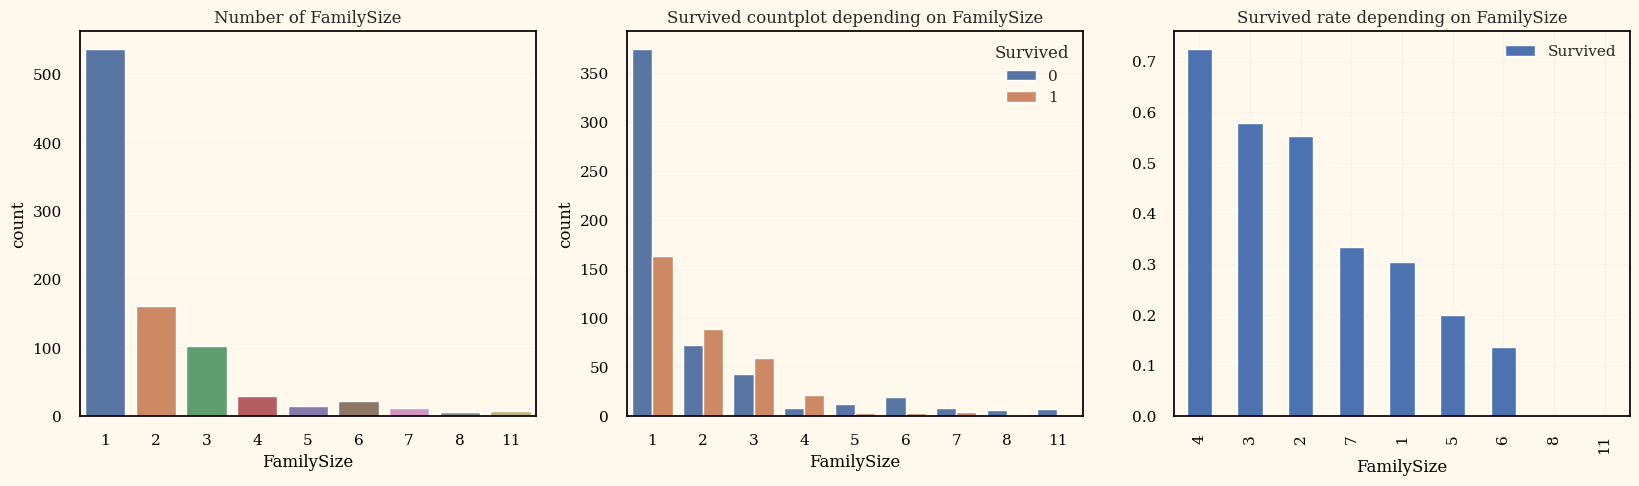

In [313]:
f, ax = plt.subplots(1, 3, figsize = (20, 5))

# 가족 수
sns.countplot(data = df_train, x = 'FamilySize', ax = ax[0])
ax[0].set_title('Number of FamilySize')

# 가족 수별 생존 여부
sns.countplot(data = df_train, x = 'FamilySize', hue = 'Survived', ax = ax[1])
ax[1].set_title('Survived countplot depending on FamilySize')

# 항구별 생존 비율
df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('Survived rate depending on FamilySize')

- 가족 수는 1 ~ 11값을 가지고 대부분 1인 값이었다.
- 가족 4명인 경우에 생존확률이 높았다.
- 가장 많은 수를 차지했던 1, 2, 3, 4 중 4, 3, 2, (7), 1 순으로 생존 확률이 정렬된 것으로 보아 가족 수가 너무 적어도, 너무 커도 생존 확률이 작은 것을 확인할 수 있다.

### 2.8 Fare 탑승 요금
- Continuous feature


C:\Users\cyh51\AppData\Local\Temp\ipykernel_25752\1561069368.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()))


Text(0.5, 0.98, 'Skewness of Fare')

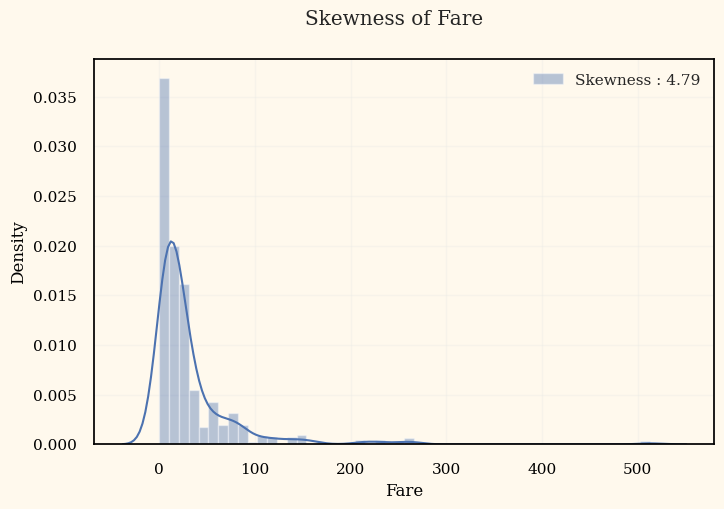

In [314]:
# seaborn의 distplot을 활용해 Skewness왜도(비대칭도) 확인 
# 카이제곱분포처럼 오른쪽으로 긴 꼬리를 가진 경우의 왜도는 '양수'

plt.figure(figsize = (8, 5))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()))
g.legend(loc = 'best') # 범례 최적의 위치에 표시
plt.suptitle('Skewness of Fare')


- 데이터 분포가 쏠려있다(high skewness) 
- 이대로 모델이 학습하고 몇 개 없는 outlier에 대해 민감하게 반응하면 예측 시에 좋지 못한 결과를 부를 수 있다.
- 이상치(outlier)의 영향을 줄이기 위해 log를 취하자.

In [315]:
# train, test 데이터에 log 스케일링
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
g.legend(loc = 'best') # 범례 최적의 위치에 표시

C:\Users\cyh51\AppData\Local\Temp\ipykernel_25752\1532087383.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()))


Text(0.5, 0.98, 'Log Skewness of Fare')

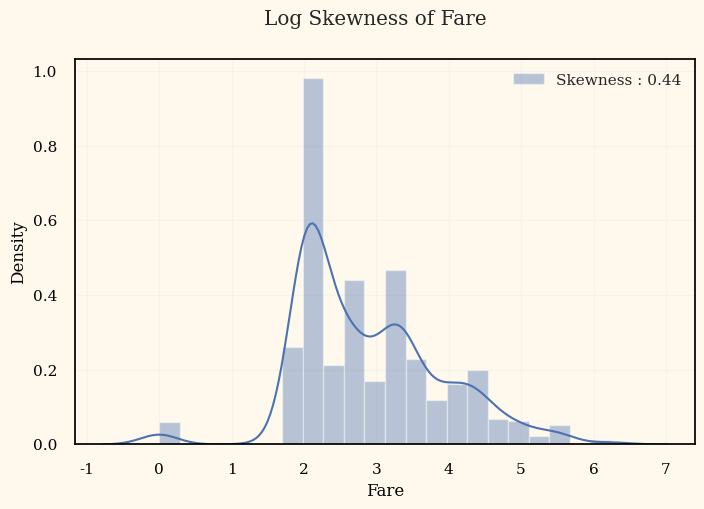

In [316]:
plt.figure(figsize = (8, 5))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()))
g.legend(loc = 'best')
plt.suptitle('Log Skewness of Fare')

### 2.9 Cabin
- NaN이 많은 feature
- 생존율 예측에 중요하게 작용하지는 않을 것임
- 모델 feature에서 제외

In [318]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

### 2.10 Ticket
- string data
- feature engineering이 필요한 feature

In [320]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [325]:
df_train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Ticket의 count가 891개, unique가 681개인 것을 보아 티켓 종류가 다양하다는 것을 알 수 있다.
- 가장 많은 사람이 가진 티켓 수가 7장.. 종류를 좀 통일하던가 티켓의 규칙을 찾아내면 티켓도 종류별로 나눌 수 있지 않을까?

In [328]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64